# OVERSAMPLING DATASET TEXTUAL MENGGUNAKAN PARAPHRASE GENERATION



### Nama Anggota:
- Jericho Nathanael Chrisnanta - 5025221001
- Tunas Abdi Pranata - 5025221043
- Muhammad Bimatara Indianto - 5025221260

### Import needed stuff

In [ ]:
import pandas as pd
import numpy as np
import requests
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings
import string

### Download Tweer.csv + Open file

In [ ]:
!wget https://gist.githubusercontent.com/jjchoNC/16c564fc4f7f10876e187791377ae56a/raw/90af451b44a1884af7db0bf56c4c1cb949c7ed02/Tweet.csv

import os
import numpy as np
import pandas as pd

file_path = 'Tweet.csv'

df = pd.read_csv(file_path)
# df.head(n=10)
df


--2024-11-28 11:02:32--  https://gist.githubusercontent.com/jjchoNC/16c564fc4f7f10876e187791377ae56a/raw/90af451b44a1884af7db0bf56c4c1cb949c7ed02/Tweet.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/plain]
Saving to: ‘Tweet.csv’

Tweet.csv           100%[===================>]   3.26M  --.-KB/s    in 0.06s   

2024-11-28 11:02:32 (54.3 MB/s) - ‘Tweet.csv’ saved [3421431/3421431]



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
# prompt: print each sentiments value count

sentiment_counts = df['airline_sentiment'].value_counts()
sentiment_counts

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


### Sentiment Count

In [ ]:
def ShowNdata(n, data):
  cnt = 0
  for i in data:
    print(i)
    if cnt == n:
      break
    cnt += 1

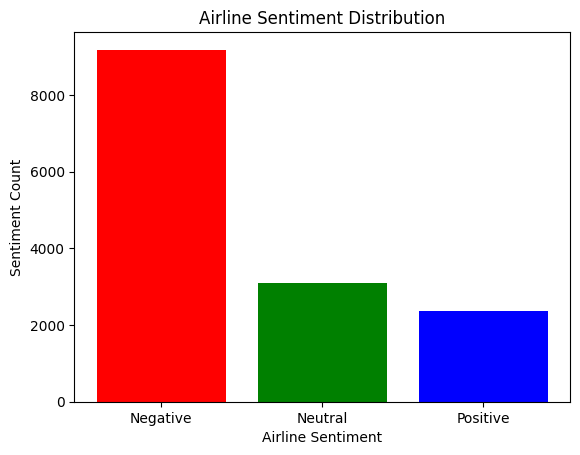

In [ ]:
import matplotlib.pyplot as plt

sentiments = df.airline_sentiment.value_counts()

index = [1,2,3]
plt.bar(index, sentiments, color=['r','g','b'])
plt.xticks(index,['Negative','Neutral','Positive'])
plt.xlabel('Airline Sentiment')
plt.ylabel('Sentiment Count')
plt.title('Airline Sentiment Distribution')
plt.show()

In [ ]:
print('Reasons Of Negative Tweets :')
print(df.negativereason.value_counts())

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords_list = stopwords.words('english')

whitelist = ["n't", "not", "no"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Cleaning

In [ ]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
def clean_text(df):
    # Concatenate columns
    try:
        df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text']
    except:
        df['final_text'] = df['final_text']
    # Apply all cleaning functions
    df['final_text'] = df['final_text'].apply(remove_username)
    df['final_text'] = df['final_text'].apply(remove_url)
    df['final_text'] = df['final_text'].apply(remove_emoji)
    df['final_text'] = df['final_text'].apply(decontraction)
    df['final_text'] = df['final_text'].apply(seperate_alphanumeric)
    df['final_text'] = df['final_text'].apply(lambda text: unique_char(cont_rep_char, text))
    df['final_text'] = df['final_text'].apply(char)
    df['final_text'] = df['final_text'].str.lower()
    df['final_text'] = df['final_text'].apply(remove_stopwords)

    return df

In [ ]:
df = clean_text(df)
clean_df = df[['final_text','airline_sentiment','negativereason']]
clean_df.head(10)

,final_text,airline_sentiment,negativereason
0,said,neutral,NaN
1,plus added commercials experience tacky,positive,NaN
2,today must mean need take another trip,neutral,NaN
3,bad flight really aggressive blast obnoxious e...,negative,Bad Flight
4,ca tell really big bad thing,negative,Can't Tell
5,ca tell seriously would pay flight seats playi...,negative,Can't Tell
6,yes nearly every time fly vx ear worm go away,positive,NaN
7,really missed prime opportunity men without ha...,neutral,NaN
8,well,positive,NaN
9,amazing arrived hour early good,positive,NaN


### Data Imbalance Training + Predict

In [ ]:
vectorizer = TfidfVectorizer()
clean_df['final_text'] = clean_df['final_text'].astype(str)

vectorizer.fit_transform(clean_df['final_text'].values)

X2_train_bfr, X2_test_bfr, y2_train_bfr, y2_test_bfr = train_test_split(clean_df['final_text'] , clean_df['airline_sentiment'] , test_size=0.3,random_state=2)

train_index = X2_train_bfr.index
test_index = X2_test_bfr.index

X2_train_bfr_vector_1 = vectorizer.transform(X2_train_bfr.values)
X2_test_bfr = vectorizer.transform(X2_test_bfr.values)

train_index
test_index

<ipython-input-109-6d0b1151cbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['final_text'] = clean_df['final_text'].astype(str)


Index([ 8917,  9534, 12875,  4601,  4308, 10981, 11037, 12991,  5685,  5784,
       ...
        3399,  8003,  2822,  9586,  8788,  4761, 11318,   810, 13705,  3481],
      dtype='int64', length=4392)

##### random forest model

In [ ]:
random_forest_classifier_2 = RandomForestClassifier()
random_forest_classifier_2.fit(X2_train_bfr_vector_1, y2_train_bfr)

RandomForestClassifier()

In [ ]:
random_forest_classifier_prediction_2 =  random_forest_classifier_2.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, random_forest_classifier_prediction_2))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      2707
     neutral       0.79      0.82      0.80       948
    positive       0.82      0.65      0.73       737

    accuracy                           0.90      4392
   macro avg       0.86      0.82      0.84      4392
weighted avg       0.90      0.90      0.90      4392



##### xgb model

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y2_train_bfr_xgb = label_encoder.fit_transform(y2_train_bfr)
y2_test_bfr_xgb = label_encoder.transform(y2_test_bfr)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X2_train_bfr_vector_1, y2_train_bfr_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_classifier_prediction = xgb_classifier.predict(X2_test_bfr)
print(classification_report(y2_test_bfr_xgb, xgb_classifier_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2707
           1       0.80      0.86      0.83       948
           2       0.82      0.70      0.76       737

    accuracy                           0.92      4392
   macro avg       0.87      0.85      0.86      4392
weighted avg       0.92      0.92      0.92      4392



##### gbc model

In [ ]:
gbc_classifier = GradientBoostingClassifier()
gbc_classifier.fit(X2_train_bfr_vector_1, y2_train_bfr)

GradientBoostingClassifier()

In [ ]:
gbc_classifier_prediction = gbc_classifier.predict(X2_test_bfr)
classification_report(y2_test_bfr, gbc_classifier_prediction)

'              precision    recall  f1-score   support\n\n    negative       0.97      1.00      0.98      2707\n     neutral       0.76      0.85      0.80       948\n    positive       0.82      0.60      0.69       737\n\n    accuracy                           0.90      4392\n   macro avg       0.85      0.82      0.83      4392\nweighted avg       0.90      0.90      0.89      4392\n'

##### svm model

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X2_train_bfr_vector_1, y2_train_bfr)

SVC()

In [ ]:
svm_classifier_prediction = svm_classifier.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, svm_classifier_prediction))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      2707
     neutral       0.78      0.86      0.82       948
    positive       0.86      0.66      0.75       737

    accuracy                           0.91      4392
   macro avg       0.87      0.84      0.85      4392
weighted avg       0.91      0.91      0.91      4392



##### naive bayes model

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X2_train_bfr_vector_1, y2_train_bfr)

MultinomialNB()

In [ ]:
nb_classifier_prediction = nb_classifier.predict(X2_test_bfr)
classification_report(y2_test_bfr, nb_classifier_prediction)

'              precision    recall  f1-score   support\n\n    negative       0.68      1.00      0.81      2707\n     neutral       0.81      0.18      0.30       948\n    positive       0.89      0.21      0.34       737\n\n    accuracy                           0.69      4392\n   macro avg       0.79      0.46      0.48      4392\nweighted avg       0.74      0.69      0.62      4392\n'

In [ ]:
# make graph



### SMOTE Balancing Oversampling + Training + Predict

In [ ]:
SMOTE = SMOTE(random_state=1337)
X2_train_bfr_vector_2, y2_train_bfr_vector_2 = SMOTE.fit_resample(X2_train_bfr_vector_1, y2_train_bfr)

##### random forest model

In [ ]:
random_forest_classifier_3 = RandomForestClassifier()
random_forest_classifier_3.fit(X2_train_bfr_vector_2, y2_train_bfr_vector_2)

RandomForestClassifier()

In [ ]:
random_forest_classifier_prediction_3 =  random_forest_classifier_3.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, random_forest_classifier_prediction_3))

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98      2707
     neutral       0.79      0.80      0.80       948
    positive       0.79      0.71      0.75       737

    accuracy                           0.90      4392
   macro avg       0.85      0.84      0.84      4392
weighted avg       0.90      0.90      0.90      4392



##### xgb model

In [ ]:
label_encoder = LabelEncoder()

y2_train_bfr_xgb_2 = label_encoder.fit_transform(y2_train_bfr_vector_2)
y2_test_bfr_xgb_2 = label_encoder.transform(y2_test_bfr)

xgb_classifier_2 = XGBClassifier()
xgb_classifier_2.fit(X2_train_bfr_vector_2, y2_train_bfr_xgb_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_classifier_prediction_2 = xgb_classifier_2.predict(X2_test_bfr)
print(classification_report(y2_test_bfr_xgb_2, xgb_classifier_prediction_2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2707
           1       0.79      0.86      0.83       948
           2       0.82      0.70      0.76       737

    accuracy                           0.92      4392
   macro avg       0.87      0.85      0.86      4392
weighted avg       0.92      0.92      0.92      4392



##### gbc model

In [ ]:
gbc_classifier_2 = GradientBoostingClassifier()
gbc_classifier_2.fit(X2_train_bfr_vector_2, y2_train_bfr_vector_2)

GradientBoostingClassifier()

In [ ]:
gbc_classifier_prediction_2 = gbc_classifier_2.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, gbc_classifier_prediction_2))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      2707
     neutral       0.75      0.87      0.80       948
    positive       0.82      0.61      0.70       737

    accuracy                           0.90      4392
   macro avg       0.85      0.83      0.83      4392
weighted avg       0.90      0.90      0.90      4392



##### svm model

In [ ]:
svm_classifier_2 = SVC()
svm_classifier_2.fit(X2_train_bfr_vector_2, y2_train_bfr_vector_2)

SVC()

In [ ]:
svm_classifier_prediction_2 = svm_classifier_2.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, svm_classifier_prediction_2))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      2707
     neutral       0.79      0.84      0.81       948
    positive       0.84      0.68      0.75       737

    accuracy                           0.91      4392
   macro avg       0.87      0.84      0.85      4392
weighted avg       0.91      0.91      0.91      4392



##### naive bayes model

In [ ]:
nb_classifier_2 = MultinomialNB()
nb_classifier_2.fit(X2_train_bfr_vector_2, y2_train_bfr_vector_2)

MultinomialNB()

In [ ]:
nb_classifier_prediction_2 = nb_classifier_2.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, nb_classifier_prediction_2))

              precision    recall  f1-score   support

    negative       0.88      0.96      0.92      2707
     neutral       0.77      0.58      0.66       948
    positive       0.74      0.74      0.74       737

    accuracy                           0.84      4392
   macro avg       0.80      0.76      0.77      4392
weighted avg       0.84      0.84      0.83      4392



### Paraphrase 1000 Data + Training + Predict [Oversampling]

In [ ]:
data = {'final_text': X2_train_bfr, 'airline_sentiment': y2_train_bfr}
dfTemp = pd.DataFrame(data)
sentiments = dfTemp.airline_sentiment.value_counts()
print(sentiments)

airline_sentiment
negative    6471
neutral     2151
positive    1626
Name: count, dtype: int64


In [ ]:
sentiments = dfTemp.airline_sentiment.value_counts()
print(sentiments)

NEEDED_DATA = 1000
TOTAL_DATA = sentiments.sum()
NEG_COUNT = sentiments['negative']
POS_COUNT = sentiments['positive']
NEU_COUNT = sentiments['neutral']


NEG_NEEDED = int((NEG_COUNT / TOTAL_DATA) * NEEDED_DATA)
POS_NEEDED = int((POS_COUNT / TOTAL_DATA) * NEEDED_DATA)
NEU_NEEDED = int((NEU_COUNT / TOTAL_DATA) * NEEDED_DATA)

print(f"NEG_NEEDED: {NEG_NEEDED}")
print(f"POS_NEEDED: {POS_NEEDED}")
print(f"NEU_NEEDED: {NEU_NEEDED}")

para_df = pd.DataFrame(columns=['final_text', 'airline_sentiment'])

neg_df = dfTemp[dfTemp['airline_sentiment'] == 'negative']
neu_df = dfTemp[dfTemp['airline_sentiment'] == 'neutral']
pos_df = dfTemp[dfTemp['airline_sentiment'] == 'positive']

neg_sample = neg_df.sample(n=NEG_NEEDED, random_state=42)
neu_sample = neu_df.sample(n=NEU_NEEDED, random_state=42)
pos_sample = pos_df.sample(n=POS_NEEDED, random_state=42)
para_df = pd.concat([neg_sample, neu_sample, pos_sample], ignore_index=True)
para_df = para_df.sample(frac=1, random_state=42).reset_index(drop=True)

airline_sentiment
negative    6471
neutral     2151
positive    1626
Name: count, dtype: int64
NEG_NEEDED: 631
POS_NEEDED: 158
NEU_NEEDED: 209


In [ ]:
para_df

,final_text,airline_sentiment
0,cancelled flight miami phl flight cancelled fl...,negative
1,yesterday phone,neutral
2,customer service issue sil bought tix us nyc t...,negative
3,ca tell worst earth would merge flying either ...,negative
4,great operation guys running mechanical issues...,neutral
...,...,...
993,bad flight thank u hr delay boarding us onto p...,negative
994,customer service issue thank holding apologize...,negative
995,yes yes great trip thanks lift,positive
996,lost luggage bad weather understandable pilot ...,negative


In [ ]:
para_df.to_csv('para_df_to_gpt.csv', index=False)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

tokenizer = AutoTokenizer.from_pretrained("Vamsi/T5_Paraphrase_Paws")
model = AutoModelForSeq2SeqLM.from_pretrained("Vamsi/T5_Paraphrase_Paws")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [ ]:
def GenerateParaphrase(text, n):
  paraphrasedSentences = []

  encoding = tokenizer.encode_plus(text,pad_to_max_length=True, return_tensors="pt")

  input_ids, attention_masks = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

  outputs = model.generate(
      input_ids=input_ids, attention_mask=attention_masks,
      max_length=256,
      do_sample=True,
      top_k=200,
      top_p=0.95,
      early_stopping=True,
      num_return_sequences=n
  )

  for output in outputs:
    line = tokenizer.decode(output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
    paraphrasedSentences.append(line)

  return paraphrasedSentences


In [ ]:
MAX_COUNT = max(max(NEG_NEEDED, POS_NEEDED), NEU_NEEDED)

kurang_pos = MAX_COUNT - POS_NEEDED
kurang_neu = MAX_COUNT - NEU_NEEDED

print(kurang_pos)
print(kurang_neu)
neu_para = para_df[para_df['airline_sentiment'] == 'neutral']
pos_para = para_df[para_df['airline_sentiment'] == 'positive']

print(pos_para.shape[0])
print(neu_para.shape[0])


while kurang_pos > 0:
  paraphrasedSentences = GenerateParaphrase(pos_para.iloc[random.randint(0, (pos_para.shape[0] - 1))]['final_text'], 11)
  for sen in paraphrasedSentences:
    para_df = pd.concat([para_df, pd.DataFrame([{'final_text': sen, 'airline_sentiment': 'positive'}])], ignore_index=True)
  kurang_pos -= 11

while kurang_neu > 0:
  paraphrasedSentences = GenerateParaphrase(neu_para.iloc[random.randint(0, (neu_para.shape[0] - 1))]['final_text'], 2)
  for sen in paraphrasedSentences:
    para_df = pd.concat([para_df, pd.DataFrame([{'final_text': sen, 'airline_sentiment': 'neutral'}])], ignore_index=True)
  kurang_neu -= 2

473
422
158
209


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:638: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


In [ ]:
para_df.to_csv('para_df.csv', index=False)

In [ ]:
para_df = pd.read_csv('para_df.csv')
para_df = clean_text(para_df)

In [ ]:
neu_para_1 = para_df[para_df['airline_sentiment'] == 'neutral']
pos_para_1 = para_df[para_df['airline_sentiment'] == 'positive']

print(pos_para_1.shape[0])
print(neu_para_1.shape[0])

631
631


In [ ]:
X_para_1 = vectorizer.transform(para_df['final_text'].values)
Y_para_1 = para_df['airline_sentiment']


In [ ]:
print(X_para_1.shape)
print(Y_para_1.shape)

print(X2_test_bfr.shape)
print(y2_test_bfr.shape)

(1893, 10989)
(1893,)
(4392, 10989)
(4392,)


#### random forest model

In [ ]:
random_forest_classifier_3 = RandomForestClassifier()
random_forest_classifier_3.fit(X_para_1, Y_para_1)

RandomForestClassifier()

In [ ]:
random_forest_classifier_prediction_3 =  random_forest_classifier_3.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, random_forest_classifier_prediction_3))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97      2707
     neutral       0.76      0.59      0.66       948
    positive       0.62      0.68      0.65       737

    accuracy                           0.86      4392
   macro avg       0.78      0.76      0.76      4392
weighted avg       0.85      0.86      0.85      4392



#### xgb model

In [ ]:
label_encoder = LabelEncoder()

y_para_1_xgb = label_encoder.fit_transform(Y_para_1)
y_test_bfr_xgb = label_encoder.transform(y2_test_bfr)

xgb_classifier_3 = XGBClassifier()
xgb_classifier_3.fit(X_para_1, y_para_1_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_classifier_prediction_3 = xgb_classifier_3.predict(X2_test_bfr)
print(classification_report(y_test_bfr_xgb, xgb_classifier_prediction_3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2707
           1       0.74      0.80      0.77       948
           2       0.75      0.63      0.69       737

    accuracy                           0.89      4392
   macro avg       0.82      0.81      0.82      4392
weighted avg       0.89      0.89      0.89      4392



#### gbc model

In [ ]:
gbc_classifier_3 = GradientBoostingClassifier()
gbc_classifier_3.fit(X_para_1, Y_para_1)

GradientBoostingClassifier()

In [ ]:
gbc_classifier_prediction_3 = gbc_classifier_3.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, gbc_classifier_prediction_3))

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      2707
     neutral       0.69      0.87      0.77       948
    positive       0.80      0.48      0.60       737

    accuracy                           0.88      4392
   macro avg       0.82      0.78      0.78      4392
weighted avg       0.89      0.88      0.87      4392



#### svm model

In [ ]:
svm_classifier_3 = SVC()
svm_classifier_3.fit(X_para_1, Y_para_1)

SVC()

In [ ]:
svm_classifier_prediction_3 = svm_classifier_3.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, svm_classifier_prediction_3))

              precision    recall  f1-score   support

    negative       0.90      0.99      0.94      2707
     neutral       0.68      0.75      0.71       948
    positive       0.83      0.39      0.53       737

    accuracy                           0.84      4392
   macro avg       0.80      0.71      0.73      4392
weighted avg       0.84      0.84      0.82      4392



#### naive bayes model

In [ ]:
nb_classifier_3 = MultinomialNB()
nb_classifier_3.fit(X_para_1, Y_para_1)

MultinomialNB()

In [ ]:
nb_classifier_prediction_3 = nb_classifier_3.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, nb_classifier_prediction_3))

              precision    recall  f1-score   support

    negative       0.82      0.98      0.89      2707
     neutral       0.72      0.47      0.57       948
    positive       0.73      0.55      0.63       737

    accuracy                           0.80      4392
   macro avg       0.76      0.67      0.70      4392
weighted avg       0.78      0.80      0.78      4392



### Paraphrase 1000 Data + Training + Predict [Oversampling with GPT]

In [ ]:
para_df = pd.DataFrame(columns=['final_text', 'airline_sentiment'])

neg_df = dfTemp[dfTemp['airline_sentiment'] == 'negative']
neu_df = dfTemp[dfTemp['airline_sentiment'] == 'neutral']
pos_df = dfTemp[dfTemp['airline_sentiment'] == 'positive']

neg_sample = neg_df.sample(n=NEG_NEEDED, random_state=42)
neu_sample = neu_df.sample(n=NEU_NEEDED, random_state=42)
pos_sample = pos_df.sample(n=POS_NEEDED, random_state=42)
para_df = pd.concat([neg_sample, neu_sample, pos_sample], ignore_index=True)
para_df = para_df.sample(frac=1, random_state=42).reset_index(drop=True)

count_negative = para_df[para_df['airline_sentiment'] == 'negative'].shape[0]
count_positive = para_df[para_df['airline_sentiment'] == 'positive'].shape[0]
count_neutral = para_df[para_df['airline_sentiment'] == 'neutral'].shape[0]

print(count_negative)
print(count_positive)
print(count_neutral)

631
158
209


In [ ]:
MAX_COUNT = max(max(NEG_NEEDED, POS_NEEDED), NEU_NEEDED)

kurang_pos = MAX_COUNT - POS_NEEDED
kurang_neu = MAX_COUNT - NEU_NEEDED
kurang_pos, kurang_neu

(473, 422)

In [ ]:
'''

OUR CHATGPT PROMPT FOR GPT PARAPHRASING:
https://chatgpt.com/share/6728499e-61cc-8013-92e9-881c61182bd4
https://chatgpt.com/share/674307a6-c66c-8009-99db-05b46afb24c8

'''

## res
!wget 'https://gist.githubusercontent.com/jjchoNC/adc51af12c2536325b425e3a7d09e8c4/raw/4015676bd07fff97326e3db56dccd6855e960af5/neutral_gpt.csv' -O neutral_para_df.csv
!wget 'https://gist.githubusercontent.com/Haalloobim/ea9d5c9d2971803d848d78253df21374/raw/574fd93c1ec372eb12366e6ac05d96bbaa5d0e52/positive_para_df.csv' -O positive_para_df.csv

--2024-11-20 15:25:36--  https://gist.githubusercontent.com/jjchoNC/adc51af12c2536325b425e3a7d09e8c4/raw/4015676bd07fff97326e3db56dccd6855e960af5/neutral_gpt.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32558 (32K) [text/plain]
Saving to: ‘neutral_para_df.csv’

neutral_para_df.csv 100%[===================>]  31.79K  --.-KB/s    in 0.006s  

2024-11-20 15:25:36 (5.25 MB/s) - ‘neutral_para_df.csv’ saved [32558/32558]

--2024-11-20 15:25:37--  https://gist.githubusercontent.com/Haalloobim/ea9d5c9d2971803d848d78253df21374/raw/574fd93c1ec372eb12366e6ac05d96bbaa5d0e52/positive_para_df.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (g

In [ ]:
negative_para_df = para_df[para_df['airline_sentiment'] == 'negative']
negative_para_clean_df = clean_text(negative_para_df)

positive_para_df = pd.read_csv('positive_para_df.csv', delimiter=';')
positive_para_clean_df = clean_text(positive_para_df)

neutral_para_df = pd.read_csv('neutral_para_df.csv', delimiter=';')
neutral_para_clean_df = clean_text(neutral_para_df)

negative_para_clean_df, positive_para_clean_df, neutral_para_clean_df

<ipython-input-107-f63eaea1c27c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'] = df['final_text']
<ipython-input-107-f63eaea1c27c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'] = df['final_text'].apply(remove_username)
<ipython-input-107-f63eaea1c27c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

(                                            final_text airline_sentiment
 0    cancelled flight miami phl flight cancelled fl...          negative
 2    customer service issue sil bought tix us nyc t...          negative
 3    ca tell worst earth would merge flying either ...          negative
 5    customer service issue took cost flights bank ...          negative
 7    flight booking problems thanks said denied mil...          negative
 ..                                                 ...               ...
 992  customer service issue worries called back hrs...          negative
 993  bad flight thank u hr delay boarding us onto p...          negative
 994  customer service issue thank holding apologize...          negative
 996  lost luggage bad weather understandable pilot ...          negative
 997  late flight going miss hugely important meetin...          negative
 
 [631 rows x 2 columns],
                                             final_text airline_sentiment
 0         

In [ ]:
GPT_df_para = pd.DataFrame()
GPT_df_para = pd.concat([positive_para_clean_df, neutral_para_clean_df, negative_para_clean_df], ignore_index=True)
GPT_df_para = GPT_df_para.sample(frac=1, random_state=42).reset_index(drop=True)
GPT_df_para

,final_text,airline_sentiment
0,alright signed,neutral
1,sent wondering kind compensation get,positive
2,customer service issue policy tell customers h...,negative
3,thankful passport recovered,positive
4,flight attendant super helpful finding bag exc...,positive
...,...,...
1798,need double check departure time,neutral
1799,late flight flight orlando ridiculous wait hig...,negative
1800,yes please follow,neutral
1801,late flight hv wounded vet stuck chi traveling...,negative


In [ ]:
GPT_df_para.to_csv('GPT_df_para.csv', index=False)

In [ ]:
GPT_df_para = GPT_df_para.dropna(subset=['final_text', 'airline_sentiment'])
X_para_2 = vectorizer.transform(GPT_df_para['final_text'].values)
Y_para_2 = GPT_df_para['airline_sentiment']

#### random forest model

In [ ]:
GPT_random_forest_classifier_4 = RandomForestClassifier()
GPT_random_forest_classifier_4.fit(X_para_2, Y_para_2)

GPT_random_forest_classifier_prediction_4 =  GPT_random_forest_classifier_4.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, GPT_random_forest_classifier_prediction_4))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97      2707
     neutral       0.76      0.75      0.76       948
    positive       0.76      0.63      0.69       737

    accuracy                           0.88      4392
   macro avg       0.82      0.79      0.81      4392
weighted avg       0.88      0.88      0.88      4392



#### xgb model

In [ ]:
label_encoder = LabelEncoder()

y_para_2_xgb = label_encoder.fit_transform(Y_para_2)
y_test_bfr_xgb = label_encoder.transform(y2_test_bfr)

GPT_xgb_classifier_4 = XGBClassifier()
GPT_xgb_classifier_4.fit(X_para_2, y_para_2_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_classifier_prediction_4 = GPT_xgb_classifier_4.predict(X2_test_bfr)
print(classification_report(y_test_bfr_xgb, xgb_classifier_prediction_4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2707
           1       0.76      0.71      0.74       948
           2       0.69      0.72      0.70       737

    accuracy                           0.88      4392
   macro avg       0.81      0.81      0.81      4392
weighted avg       0.88      0.88      0.88      4392



#### gbc model

In [ ]:
gbc_classifier_4 = GradientBoostingClassifier()
gbc_classifier_4.fit(X_para_2, Y_para_2)

GradientBoostingClassifier()

In [ ]:
gbc_classifier_prediction_4 = gbc_classifier_4.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, gbc_classifier_prediction_4))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      2707
     neutral       0.75      0.77      0.76       948
    positive       0.74      0.64      0.69       737

    accuracy                           0.89      4392
   macro avg       0.82      0.80      0.81      4392
weighted avg       0.89      0.89      0.89      4392



#### svm model

In [ ]:
svm_classifier_4 = SVC()
svm_classifier_4.fit(X_para_2, Y_para_2)

SVC()

In [ ]:
svm_classifier_prediction_4 = svm_classifier_4.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, svm_classifier_prediction_4))

              precision    recall  f1-score   support

    negative       0.91      0.99      0.95      2707
     neutral       0.74      0.67      0.71       948
    positive       0.78      0.62      0.69       737

    accuracy                           0.86      4392
   macro avg       0.81      0.76      0.78      4392
weighted avg       0.85      0.86      0.85      4392



#### naive bayes model

In [ ]:
nb_classifier_4 = MultinomialNB()
nb_classifier_4.fit(X_para_2, Y_para_2)

MultinomialNB()

In [ ]:
nb_classifier_prediction_4 = nb_classifier_4.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, nb_classifier_prediction_4))

              precision    recall  f1-score   support

    negative       0.77      0.99      0.87      2707
     neutral       0.84      0.15      0.26       948
    positive       0.65      0.66      0.66       737

    accuracy                           0.76      4392
   macro avg       0.76      0.60      0.60      4392
weighted avg       0.77      0.76      0.70      4392



### 1000 Data SMOTE Oversampling Training + Predict

In [ ]:
X_paradf_1000 = vectorizer.transform(para_df['final_text'].values)
Y_paradf_1000 = para_df['airline_sentiment']

In [ ]:
para_df

,final_text,airline_sentiment
0,cancelled flight miami phl flight cancelled fl...,negative
1,yesterday phone,neutral
2,customer service issue sil bought tix us nyc t...,negative
3,ca tell worst earth would merge flying either ...,negative
4,great operation guys running mechanical issues...,neutral
...,...,...
993,bad flight thank u hr delay boarding us onto p...,negative
994,customer service issue thank holding apologize...,negative
995,yes yes great trip thanks lift,positive
996,lost luggage bad weather understandable pilot ...,negative


In [ ]:
from imblearn.over_sampling import SMOTE

SMOTE_paradf_1000 = SMOTE(random_state=133337)
X2_paradf_1000, Y2_paradf_1000 = SMOTE_paradf_1000.fit_resample(X_paradf_1000, Y_paradf_1000)

##### Random Forest

In [ ]:
randomForest_paradf_1000 = RandomForestClassifier()
randomForest_paradf_1000.fit(X2_paradf_1000, Y2_paradf_1000)

RandomForestClassifier()

In [ ]:
randomForest_paradf_1000_prediction = randomForest_paradf_1000.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, randomForest_paradf_1000_prediction))

              precision    recall  f1-score   support

    negative       0.95      0.99      0.97      2707
     neutral       0.74      0.80      0.77       948
    positive       0.79      0.57      0.66       737

    accuracy                           0.88      4392
   macro avg       0.83      0.79      0.80      4392
weighted avg       0.88      0.88      0.87      4392



##### xgb model

In [ ]:
label_encoder = LabelEncoder()
Y2_paradf_1000_xgb = label_encoder.fit_transform(Y2_paradf_1000)
y2_test_bfr_xgb_1000_SMOTE = label_encoder.transform(y2_test_bfr)


XGB_paradf_1000 = XGBClassifier()
XGB_paradf_1000.fit(X2_paradf_1000, Y2_paradf_1000_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
XGB_paradf_1000_prediction = XGB_paradf_1000.predict(X2_test_bfr)
print(classification_report(y2_test_bfr_xgb_1000_SMOTE, XGB_paradf_1000_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2707
           1       0.76      0.79      0.77       948
           2       0.74      0.66      0.70       737

    accuracy                           0.89      4392
   macro avg       0.83      0.81      0.82      4392
weighted avg       0.89      0.89      0.89      4392



##### gbc model

In [ ]:
GBC_paradf_1000 = GradientBoostingClassifier()
GBC_paradf_1000.fit(X2_paradf_1000, Y2_paradf_1000)

GradientBoostingClassifier()

In [ ]:
GBC_paradf_1000_prediction = GBC_paradf_1000.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, GBC_paradf_1000_prediction))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.98      2707
     neutral       0.72      0.84      0.78       948
    positive       0.78      0.58      0.67       737

    accuracy                           0.89      4392
   macro avg       0.83      0.81      0.81      4392
weighted avg       0.89      0.89      0.89      4392



##### svm model

In [ ]:
SVM_paradf_1000 = SVC()
SVM_paradf_1000.fit(X2_paradf_1000, Y2_paradf_1000)

SVC()

In [ ]:
SVM_paradf_1000_predict = SVM_paradf_1000.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, SVM_paradf_1000_predict))

              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      2707
     neutral       0.73      0.31      0.44       948
    positive       0.86      0.33      0.48       737

    accuracy                           0.74      4392
   macro avg       0.77      0.55      0.59      4392
weighted avg       0.75      0.74      0.69      4392



##### naive bayes model

In [ ]:
nb_classifier_paradf_1000 = MultinomialNB()
nb_classifier_paradf_1000.fit(X2_paradf_1000, Y2_paradf_1000)

MultinomialNB()

In [ ]:
nb_classifier_paradf_1000_prediction = nb_classifier_paradf_1000.predict(X2_test_bfr)
print(classification_report(y2_test_bfr, nb_classifier_paradf_1000_prediction))

              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      2707
     neutral       0.71      0.47      0.57       948
    positive       0.70      0.62      0.66       737

    accuracy                           0.80      4392
   macro avg       0.75      0.69      0.71      4392
weighted avg       0.79      0.80      0.79      4392

